In [3]:
import torch
import pickle
import numpy as np
import matplotlib.pyplot as plt
from environment import plotting as gp

In [72]:
# Arch A 
# bd7cf775-0883-4b36-87fd-ab13ae64ddd7 -- 1 trial 
# 9819fadb-a912-4c7a-97dc-4a217454b2ff -- 50 trials
# '3b956a7c-8afa-4e27-9cde-d0e502048406' -- 5000 trials
# trained on 19e66aab-ae94-473d-bb06-a639b7dc8049

# Arch B
#testing
#'c4cb9b4c-8587-4e6f-9e80-8b0a45cc483e' -- 1 trial
#'c3dd1e43-eb08-4d93-85c6-b773331bdb89' -- 50 trials
#'4e575e47-b447-4b47-88ce-7331cb7c7fb1' -- 5000 trials 
# trained on '016375f6-eb4f-46b5-8ce1-80a6ad0ad603' 

# Arch B phi input to EC
#'ec404ea4-b252-43e5-9190-a776011d614e' -- 5000 trials

load_id = 'ec404ea4-b252-43e5-9190-a776011d614e'

trained_on = '016375f6-eb4f-46b5-8ce1-80a6ad0ad603' 

In [73]:
agent = torch.load(f'./data/agent_weights/{load_id}.pt')

with open(f'./data/episodic_memory/{load_id}_EC.p', 'rb') as f:
        EC = pickle.load(f)


with open(f'./data/environments/{trained_on}_env.p', 'rb') as f:
        env = pickle.load(f)
        env.rewards = {(15,15): 10}

In [75]:
EC.mem_temp = 1
sample_observations = env.get_sample_obs()
for ind, observation in enumerate(sample_observations[0]):
    state = sample_observations[1][ind]
    obs =  torch.Tensor(np.expand_dims(observation, axis=0))
    
    policy_, value_, phi_, psi_ = agent(obs) #archb
    #policy_, value_, psi_ = agent(obs) # arch a 
    
    lin_act = tuple(np.round(phi_.data[0].numpy(), 4))
    EC_pol_grid[state[0],state[1]] = tuple(EC.recall_mem(lin_act, timestep=0))

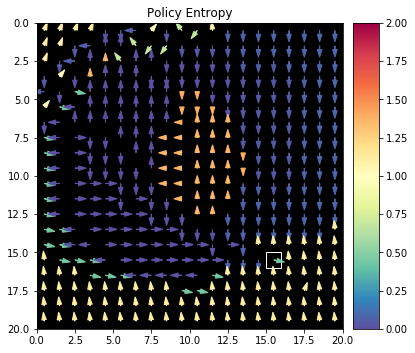

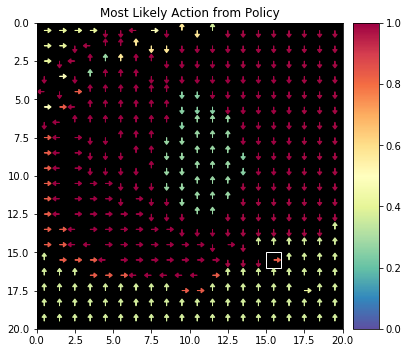

In [76]:
gp.plot_pref_pol(env, EC_pol_grid)
gp.plot_polmap(env,EC_pol_grid)